# GLMを通してNNを理解する

一般にNeural Network Model(以下NN)はGeneralized Linear Model(以下GLM)の文脈で学ばれます。GLMの多出力・多層モデルがNNと同値関係あるからです。

まずは重回帰の線形回帰モデルをバッチ学習ができるように組んでみましょう。

### 重回帰

<div style="text-align: center;">仮定関数：$ \hat{y} = XW $ とする。</div>
\begin{align}
    \hat{y} = 
        \begin{bmatrix}
            \hat{y_1} \\
            \hat{y_2} \\
            \vdots \\
            \hat{y_n}
        \end{bmatrix},
    W &= 
        \begin{bmatrix}
            w_0 \\
            w_1 \\
            w_2 \\
            \vdots \\
            w_d
        \end{bmatrix},
    X = 
        \begin{bmatrix}
            x_{01} && x_{11} && \cdots && x_{d1} \\
            x_{02} && x_{12} && \cdots && x_{d2} \\
            \vdots && \vdots && \ddots && \vdots \\
            x_{0n} && x_{1n} && \cdots && x_{dn}
        \end{bmatrix} \\
\end{align}
<div style="text-align: center;">評価関数: $J=\frac{1}{2}||y-\hat{y}||^2$ であるとき。</div>
\begin{align}
    \frac{\partial J}{\partial w} &= -X^T(y-\hat{y})
    \\
    w_{new} &= w_{old} - \alpha \frac{\partial J}{\partial w}  \\
            &= w_{old} + \alpha X^T(y-\hat{y})
\end{align}

In [490]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [491]:
class LinearRegression:
    def __init__(self,bias=True):
        self.bias = bias
    
    def optimize(self,X,y):
        self.w += self.lr * X.T@(y-X@self.w)/self.n_sample
        
    def fit(self, X, y, lr=0.01, epoch=100, verbose=True):
        self.lr = lr
        self.n_sample = len(y)
        self.loss_lst = np.empty(epoch)
        
        #biasアリ/ナシ
        if self.bias == True:
            self.w = np.zeros((X.shape[1]+1,1))
            X = np.concatenate((np.ones(self.n_sample).reshape((-1,1)),X),axis=1)
        else:
            self.w = np.zeros((X.shape[1],1))
        y = y.reshape(self.n_sample,1)
        
        print(y.shape)
        for i in range(epoch):
            self.optimize(X,y)
            if verbose == True:
                y_ = self.predict(X)
                loss = ((y_ - y).T@(y_ - y)/self.n_sample).astype(np.float)
                self.loss_lst[i] = loss
                
        if verbose == True:
            self.loss_lst = self.loss_lst
            plt.plot(range(epoch),self.loss_lst)
            plt.show()
            
                
    def predict(self,X):
        if X.shape[1] != self.w.shape[0]:
            X = np.concatenate((np.ones(X.shape[0]).reshape((-1,1)),X),axis=1)
            
        y = X@self.w
        return y

### トイデータ作成

(8, 7)
(8, 1)


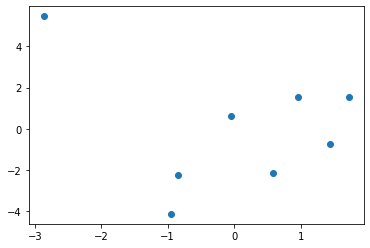

In [522]:
X = np.random.randn(8,1)
y = X**2 + np.random.randn(8,1)/4
X = np.concatenate([X,X**2,X**3,X**4,X**5,X**6,X**7],axis=1)
y_mean = y.mean(axis=0)
X_mean = X.mean(axis=0)
y_var = y.var(axis=0)
X_var = X.var(axis=0)
y = (y-y_mean)/y_var
X = (X-X_mean)/X_var
print(X.shape)
print(y.shape)
plt.scatter(X[:,0],y)
#plt.show()

-1.6594565445148095
1.5195776918803447
(8, 1)


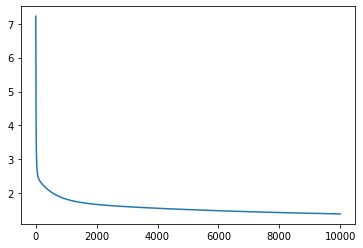

(8, 1)


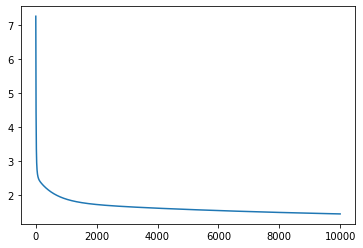

(8, 1)


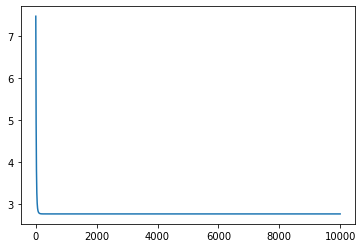

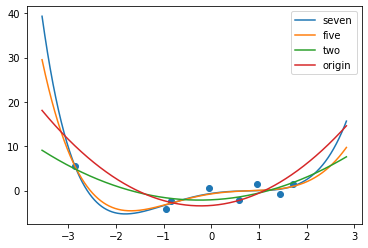

In [527]:
SGD = LinearRegression()
"""
SGD.fit(X,y.reshape(-1),epoch=10000)
X_ = np.linspace(0,20,100).reshape(100,1)
X_ = np.concatenate([X_,X_**2,X_**3,X_**4,X_**5,X_**6,X_**7,X_**8,X_**9],axis=1)
X_ = (X_-X_.mean(axis=0))/X_.var(axis=0)
y1 = SGD.predict(X_)

SGD.fit(X[:,:7],y.reshape(-1),epoch=10000)
X_ = np.linspace(0,20,100).reshape(100,1)
X_ = np.concatenate([X_,X_**2,X_**3,X_**4,X_**5,X_**6,X_**7],axis=1)
X_ = (X_-X_.mean(axis=0))/X_.var(axis=0)
y2 = SGD.predict(X_)

SGD.fit(X[:,:5],y.reshape(-1),epoch=10000)
X_ = np.linspace(0,20,100).reshape(100,1)
X_ = np.concatenate([X_,X_**2,X_**3,X_**4,X_**5],axis=1)
X_ = (X_-X_.mean(axis=0))/X_.var(axis=0)
y3 = SGD.predict(X_)

SGD.fit(X[:,:3],y.reshape(-1),epoch=10000)
X_ = np.linspace(0,20,100).reshape(100,1)
X_ = np.concatenate([X_,X_**2,X_**3],axis=1)
X_ = (X_-X_.mean(axis=0))/X_.var(axis=0)
y4 = SGD.predict(X_)

SGD.fit(X[:,:],y.reshape(-1),epoch=110)
X_ = np.linspace(1,3,100).reshape(100,1)
X_ = np.concatenate([X_,X_**2,X_**3,X_**4,X_**5],axis=1)
y4 = SGD.predict(X_)
"""
x_min = np.min(X[:,0]) + 1.2
x_max = np.max(X[:,0]) - 0.2

print(x_min)
print(x_max)

SGD.fit(X[:,:],y.reshape(-1),epoch=10000)
X_ = np.linspace(x_min,x_max,1000).reshape(1000,1)
X_ = np.concatenate([X_,X_**2,X_**3,X_**4,X_**5,X_**6,X_**7],axis=1)
y_ = (y_-y_mean)/y_var
X_ = (X_-X_mean)/X_var
y3 = SGD.predict(X_)

SGD.fit(X[:,:5],y.reshape(-1),epoch=10000)
X_ = np.linspace(x_min,x_max,1000).reshape(1000,1)
X_ = np.concatenate([X_,X_**2,X_**3,X_**4,X_**5],axis=1)
y_ = (y_-y_mean)/y_var
X_ = (X_-X_mean[:5])/X_var[:5]
y4 = SGD.predict(X_)

SGD.fit(X[:,0:2],y.reshape(-1),epoch=10000)
X_ = np.linspace(x_min,x_max,1000).reshape(1000,1)
X_ = np.concatenate([X_,X_**2],axis=1)
y_ = (y_-y_mean)/y_var
X_ = (X_-X_mean[:2])/X_var[:2]
y5 = SGD.predict(X_)

X_ = np.linspace(x_min,x_max,1000).reshape(1000,1)
y_ = X_**2
y_ = (y_-y_mean)/y_var
X_ = (X_-X_mean[0])/X_var[0]
#plt.plot(X_,y1)
#plt.plot(X_,y2)

plt.plot(X_,y3,label="seven")
plt.plot(X_,y4,label="five")
plt.plot(X_,y5,label="two")
plt.plot(X_,y_,label="origin")
plt.scatter(X[:,0],y)
plt.legend()
plt.show()

ValueError: x and y must be the same size

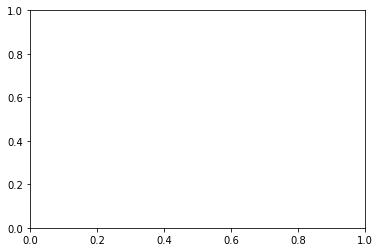

In [494]:
plt.scatter(X[:,0],y_pred)
plt.scatter(X[:,0],y)
plt.show()
plt.scatter(X[:,1],y_pred)
plt.scatter(X[:,1],y)
plt.show()


ここまではただの線形回帰です。
さっきの回帰では、X_1,X_2,X_3という特徴量が

In [ ]:
print(SGD.w)